In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [11]:
import os
import matplotlib.pyplot as plt
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

seed = 1234

In [2]:
seed = 1234
np.random.seed(seed)

In [3]:
data = pd.read_csv('preprocessed_SeriesOn.csv')

data.head()

,title,year,version,type,director,actor,age,runtime,rating,like,...,is_action,is_comedy,is_drama,is_melo,is_horror,is_fantasy,is_animation,is_DQ,is_indie,is_concert
0,'개그' 더 크라운,2021,Null,구매,아담 크라우스,"로렌 애슐리 카터,트레이시 페레즈",15세 관람가,89,6.33,0,...,0,1,0,0,1,0,0,0,0,0
1,'데이빗 린치' 단편선,0,Null,구매,데이빗 린치,Null,19세 관람가,148,10.00,21,...,0,0,1,0,0,0,0,0,0,0
2,...ing,2003,Null,구매,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,9,...,0,0,0,1,0,0,0,0,0,0
3,...ing,2003,Null,대여,이언희,"임수정,김래원,이미숙,최덕문,이성경,김지영,윤덕현,이유정",12세 관람가,103,8.89,4,...,0,0,0,1,0,0,0,0,0,0
4,0,0,Null,구매,이보리,"박현수,이보리,전혜원,이민지,공예림",15세 관람가,18,10.00,1,...,0,0,1,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29185 entries, 0 to 29184
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         29185 non-null  object 
 1   year          29185 non-null  int64  
 2   version       29185 non-null  object 
 3   type          29185 non-null  object 
 4   director      29185 non-null  object 
 5   actor         29185 non-null  object 
 6   age           29185 non-null  object 
 7   runtime       29185 non-null  int64  
 8   rating        29185 non-null  float64
 9   like          29185 non-null  int64  
 10  comment       29185 non-null  int64  
 11  isDRM         29185 non-null  object 
 12  cost          29185 non-null  int64  
 13  period        29185 non-null  object 
 14  is_action     29185 non-null  int64  
 15  is_comedy     29185 non-null  int64  
 16  is_drama      29185 non-null  int64  
 17  is_melo       29185 non-null  int64  
 18  is_horror     29185 non-nu

In [5]:
numeric_columns = ['year', 'runtime', 'rating', 'like', 'comment', 'cost']
category_columns = ['version', 'type', 'age', 'isDRM', 'period']

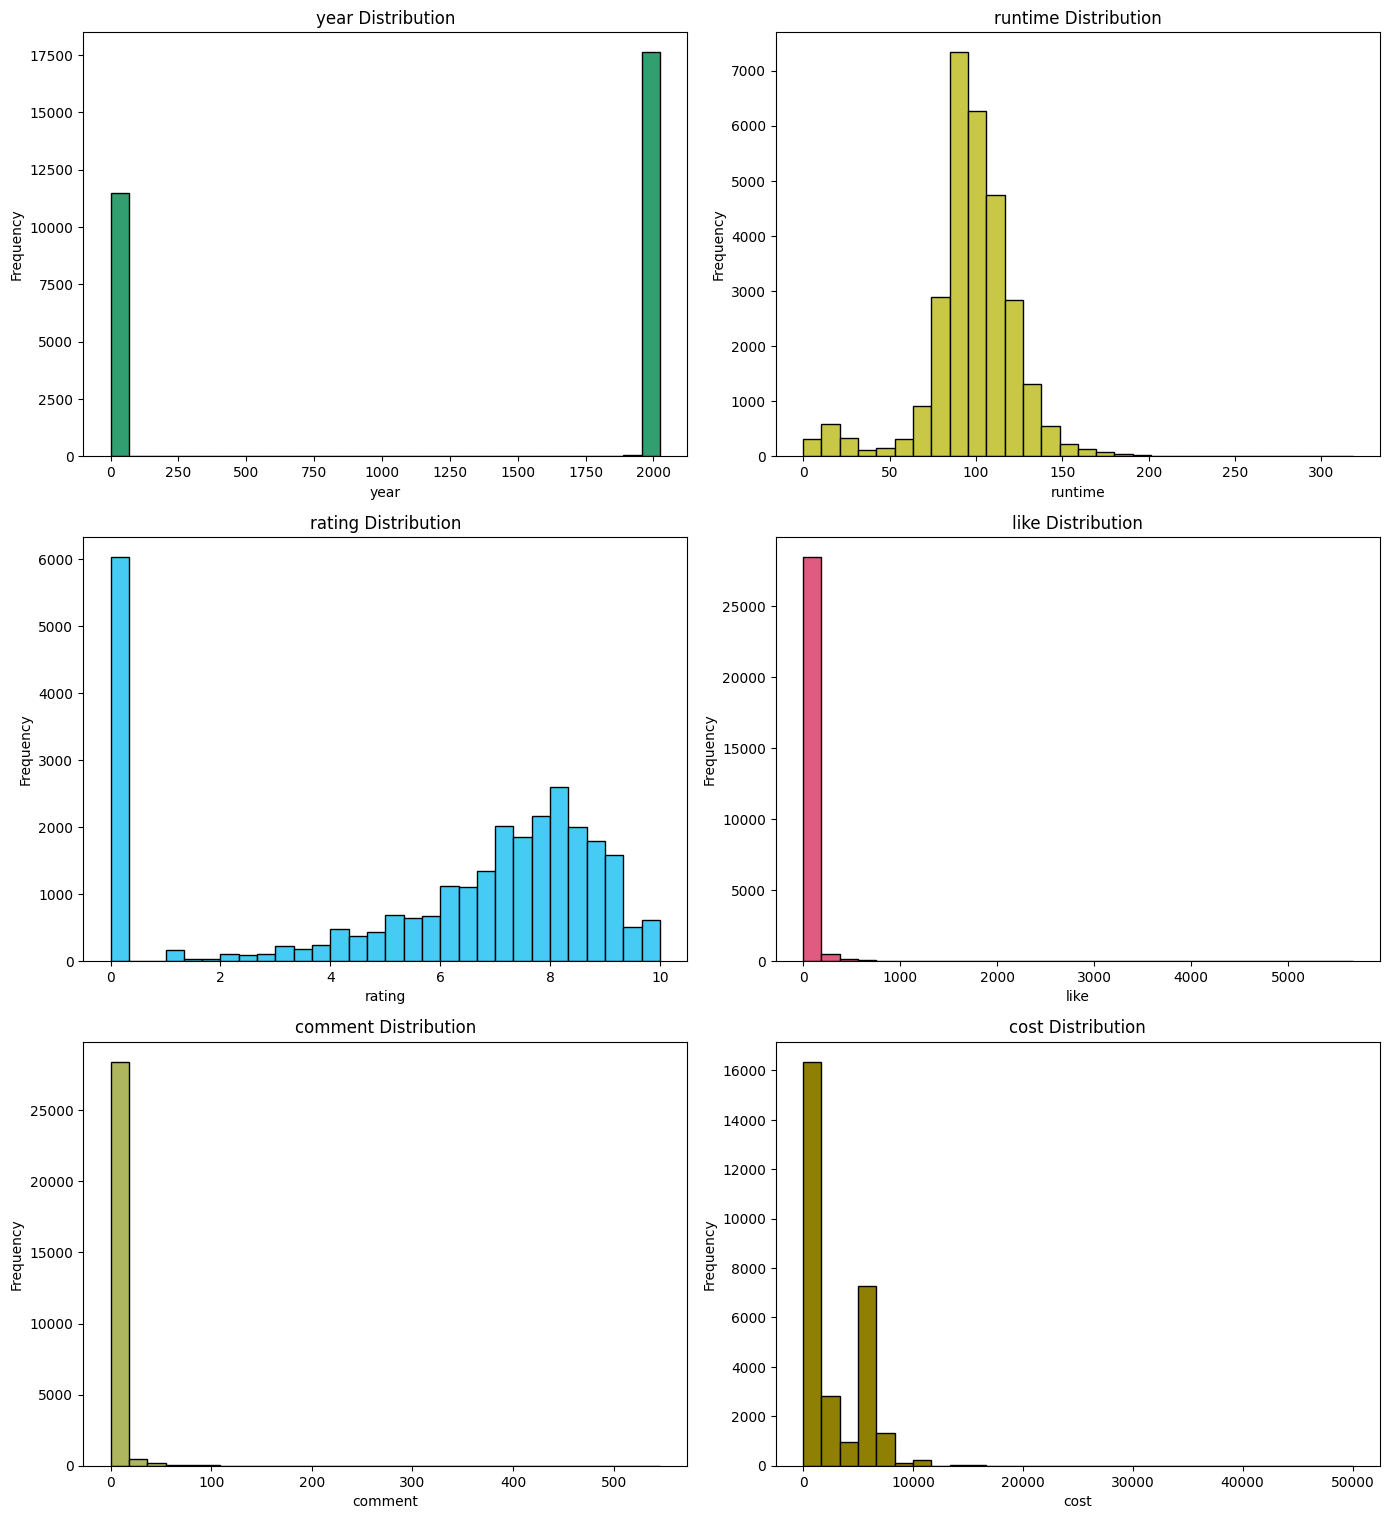

In [7]:
numeric_data = data[numeric_columns]

plt.figure(figsize=(14, 30))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(6, 2, idx+1)
    plt.hist(numeric_data[numeric], bins=30, color=col, edgecolor='black')
    plt.title(f'{numeric} Distribution')
    plt.xlabel(numeric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

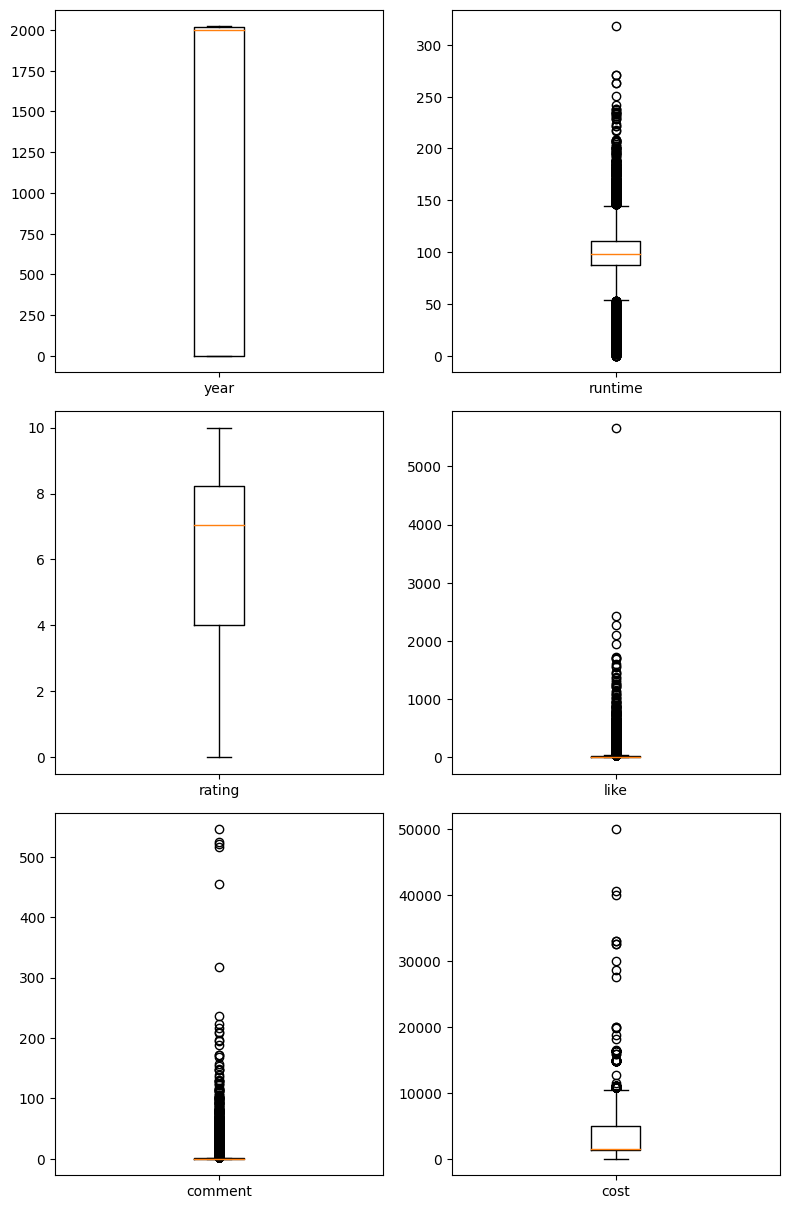

In [8]:
# 아웃 라이어 확인

plt.figure(figsize=(8, 24))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :

    plt.subplot(6, 2, idx+1)
    plt.boxplot(numeric_data[numeric].dropna(), labels=[numeric])

plt.tight_layout()
plt.show()

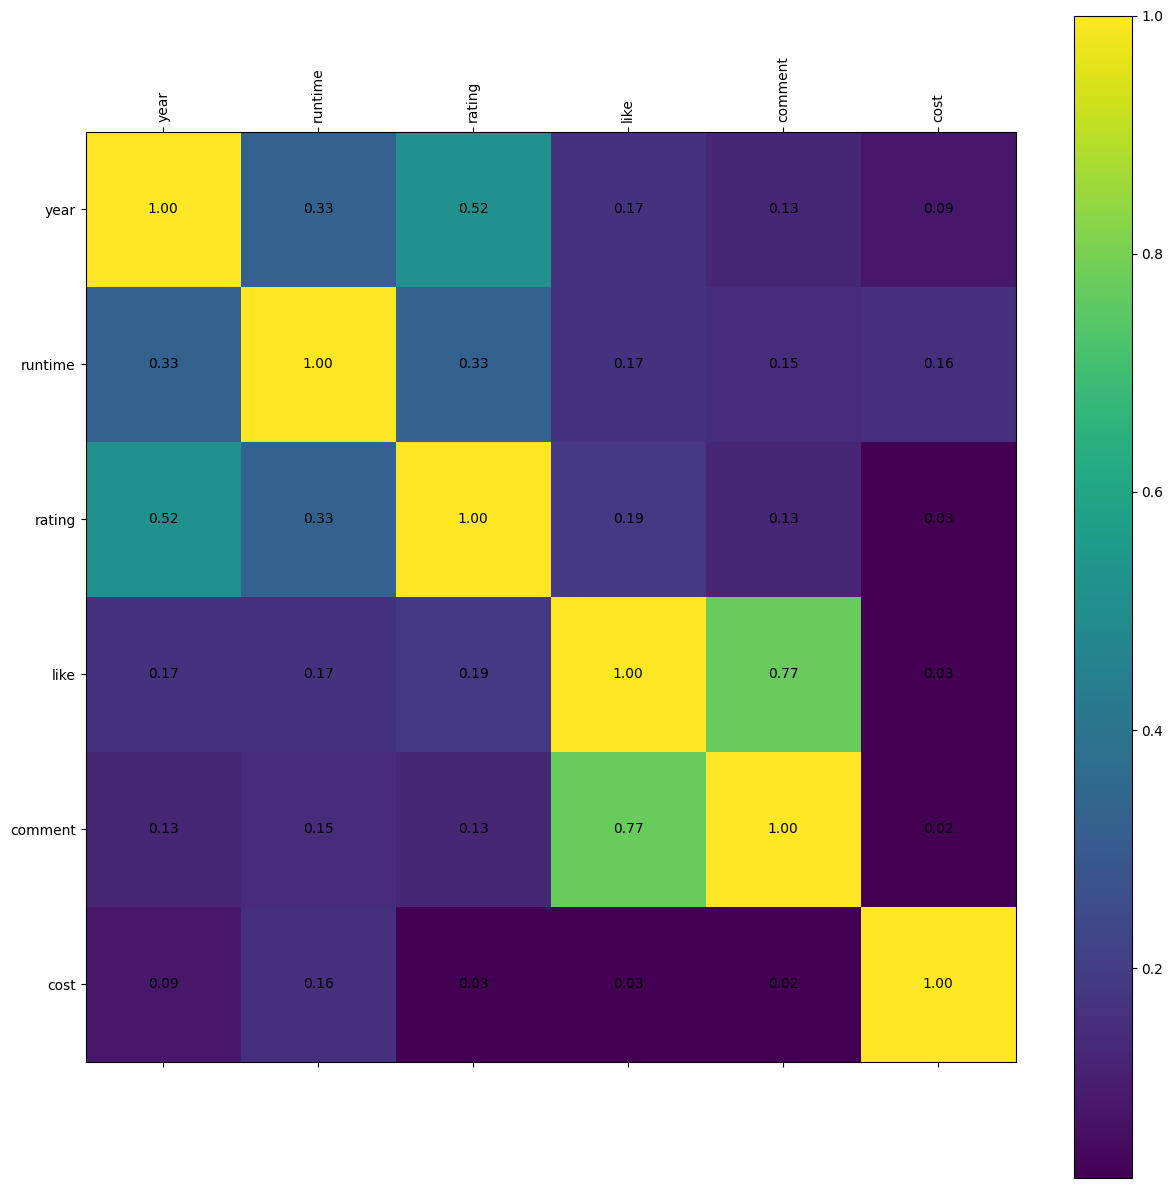

In [9]:
# 상관 관계

correlation_matrix = numeric_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(15, 15))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

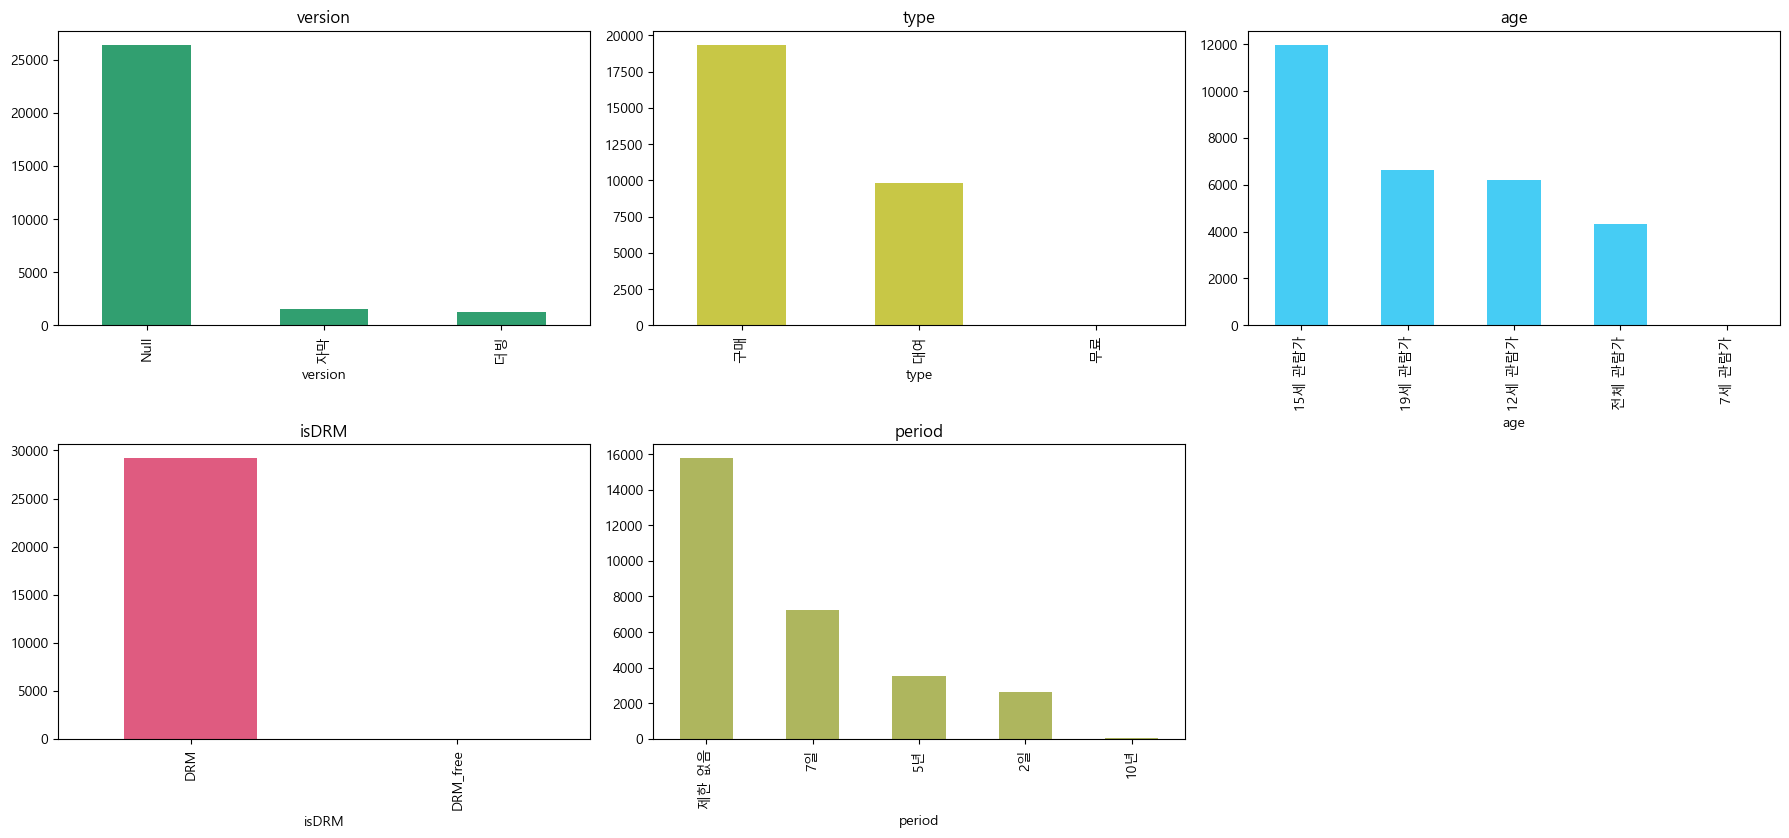

In [14]:
# 카테고형 데이터의 전체적인 분포

category_data = data[category_columns]

plt.figure(figsize=(18, 20))

np.random.seed(seed)
for idx, category in enumerate(category_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(5, 3, idx+1)
    category_data[category].value_counts().plot(kind='bar', color=col)
    plt.title(category)
    plt.tight_layout()

plt.tight_layout()
plt.show()

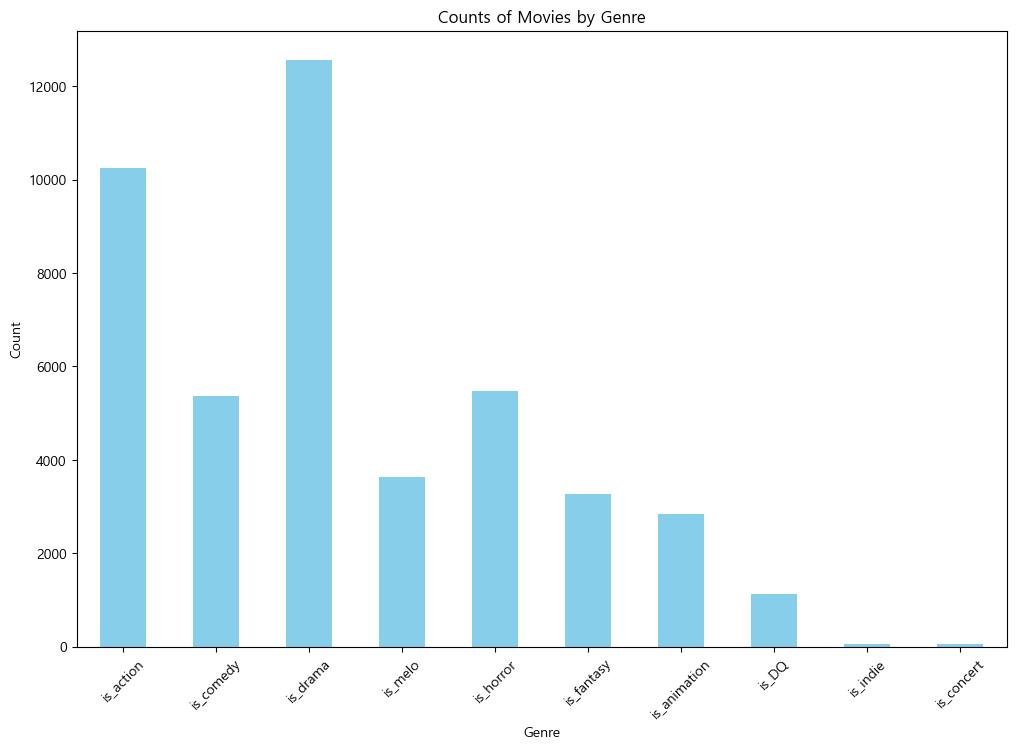

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

genre_columns = [col for col in data.columns if col.startswith('is_') and col != 'isDRM']

genre_counts = data[genre_columns].sum()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Counts of Movies by Genre')
plt.xticks(rotation=45)
plt.show()